In [1]:
import ee   # Google EarthEngine API

# Login to Google and Authenticate

- Will need to select a project to proceed. My BU account doesn't allow me to create new projects anymore, luckily I already have a project listed which I can choose.
- Update: ameta.situ@gmail.com account now has its own project and project namespace
- Token expires in 1 week. After that one will need to call ee.Authenticate() again.


In [2]:
# Trigger the authentication flow.
ee.Authenticate()


Successfully saved authorization token.


# Initialize Google EarthEngine

In [3]:
# Initialize the library.
ee.Initialize()

# Test the API

In [4]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


In [5]:
dem.sample(xy, 30)

In [6]:
t1 = dem.sample(xy, 30)
t1.varName

In [7]:
t1.getInfo()

{'type': 'FeatureCollection',
 'columns': {'elevation': 'Short'},
 'properties': {'band_order': ['elevation']},
 'features': [{'type': 'Feature',
   'geometry': None,
   'id': '0',
   'properties': {'elevation': 8729}}]}

In [8]:
t2 = t1.getArray('elevation')

In [10]:
help(t1.getArray)


Help on method Element.getArray in Element:

Element.getArray(*args, **kwargs) method of ee.featurecollection.FeatureCollection instance
    Extract a property from a feature.
    
    Args:
      object: The feature to extract the property from.
      property: The property to extract.



In [11]:
?t1.getArray

Signature: t1.getArray(*args, **kwargs)
Docstring:
Extract a property from a feature.

Args:
  object: The feature to extract the property from.
  property: The property to extract.
File:      ~/opt/anaconda3/envs/basic/lib/python3.11/site-packages/ee/apifunction.py
Type:      method

# Show static image

In [12]:
# Import the Image function from the IPython.display module.
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbURL({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

# Show interactive map

In [14]:
# Import the Folium library.
import folium

In [15]:
# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
    ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Set visualization parameters.
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3)

# Add the elevation model to the map object.
dem = ee.Image('USGS/SRTMGL1_003')
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

# Try showing AVHRR image

In [41]:
# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
    ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Set visualization parameters.
vis_params = {
    'min': -1000,
    'max': 9000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3)

# Add the elevation model to the map object.
avhrr_col = ee.ImageCollection('NOAA/CDR/AVHRR/SR/V5')
avhrr_b2 = avhrr_col.filter(ee.Filter.date('1985-01-04', '1985-01-05')).select('SREFL_CH2')
avhrr_b2m = avhrr_b2.first()
my_map.add_ee_layer(avhrr_b2m, vis_params, 'AVHRR_B2')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

# Chart visualization

In [42]:
# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

In [53]:
import numpy as np

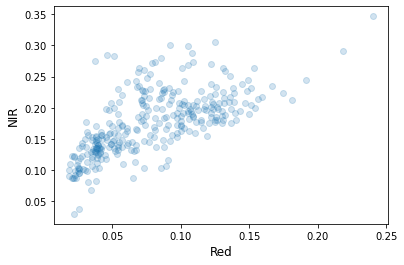

In [43]:
# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
samp_fc = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

In [49]:
tsd = samp_dict.getInfo()

In [51]:
tsd1 = tsd['list']

In [55]:
tsd2 = np.array(tsd1)

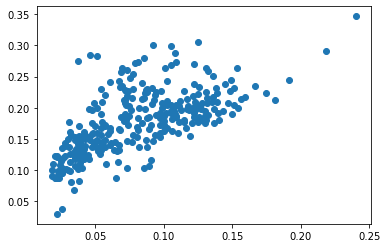

In [56]:
plt.scatter(tsd2[0], tsd2[1])